In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy as scp

from itertools import product

%matplotlib inline

headers = ['age','workclass','fnlwgt','education','education-num','marital-status',
           'occupation','relationship','race','sex','capital-gain','capital-loss',
           'hours-per-week','native-country','class']
adult = pd.read_csv('./datasets/adult.data', 
                    sep=', ', names=headers, na_values='?', engine='python')

In [85]:
# Drop all records with missing values
adult.dropna(inplace=True)
adult.reset_index(drop=True, inplace=True)

# Drop fnlwgt, not interesting for ML
adult.drop('fnlwgt', axis=1, inplace=True)
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
class             30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [86]:
# Convert objects to categories
# Education is ordered
ordered_education = ['Preschool','1st-4th','5th-6th','7th-8th','9th',
                    '10th','11th','12th','HS-grad','Assoc-acdm',
                     'Assoc-voc','Some-college','Bachelors','Prof-school',
                     'Masters','Doctorate']
adult['education'] = adult['education'].astype(pd.api.types.CategoricalDtype(categories=ordered_education, ordered=True))

#Hours per week is

# The rest are not
obj_columns = adult.select_dtypes(['object']).columns
adult[obj_columns] = adult[obj_columns].astype('category')

In [87]:
# Convert numerics to floats and normalize
num_columns = adult.select_dtypes(['int64']).columns
adult[num_columns] = adult[num_columns].astype('float64')
for c in num_columns:
    #adult[c] -= adult[c].mean()
    #adult[c] /= adult[c].std()
    adult[c] /= (adult[c].max()-adult[c].min())
adult['class'] = adult['class'].cat.codes

display(adult.info())
display(adult.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
age               30162 non-null float64
workclass         30162 non-null category
education         30162 non-null category
education-num     30162 non-null float64
marital-status    30162 non-null category
occupation        30162 non-null category
relationship      30162 non-null category
race              30162 non-null category
sex               30162 non-null category
capital-gain      30162 non-null float64
capital-loss      30162 non-null float64
hours-per-week    30162 non-null float64
native-country    30162 non-null category
class             30162 non-null int8
dtypes: category(8), float64(5), int8(1)
memory usage: 1.4 MB


None

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.5342,State-gov,Bachelors,0.8667,Never-married,Adm-clerical,Not-in-family,White,Male,0.0217,0.0,0.4082,United-States,0
1,0.6849,Self-emp-not-inc,Bachelors,0.8667,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0000,0.0,0.1327,United-States,0
2,0.5205,Private,HS-grad,0.6000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0000,0.0,0.4082,United-States,0
3,0.7260,Private,11th,0.4667,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0000,0.0,0.4082,United-States,0
4,0.3836,Private,Bachelors,0.8667,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0000,0.0,0.4082,Cuba,0
5,0.5068,Private,Masters,0.9333,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0000,0.0,0.4082,United-States,0
6,0.6712,Private,9th,0.3333,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0000,0.0,0.1633,Jamaica,0
7,0.7123,Self-emp-not-inc,HS-grad,0.6000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0000,0.0,0.4592,United-States,1
8,0.4247,Private,Masters,0.9333,Never-married,Prof-specialty,Not-in-family,White,Female,0.1408,0.0,0.5102,United-States,1
9,0.5753,Private,Bachelors,0.8667,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0518,0.0,0.4082,United-States,1


In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

enc = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', [0, 3, 9, 10, 11]),
        #('num', 'passthrough', [0, 2, 8, 9, 10]),
        ('cat', OneHotEncoder(), [1, 2, 4, 5, 6, 7, 8, 12]),])
        #('cat', OneHotEncoder(), [1, 3, 4, 5, 6, 7, 11]),])
        #('label', LabelEncoder(), 13)])

enc.fit(adult)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num', 'passthrough', [0, 3, 9, 10, 11]),
                                ('cat',
                                 OneHotEncoder(categorical_features=None,
                                               categories=None, drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               n_values=None, sparse=True),
                                 [1, 2, 4, 5, 6, 7, 8, 12])],
                  verbose=False)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adult.drop('class', axis=1), adult['class'], test_size=0.33, random_state=42)

In [90]:
# Load semantic distances from files

import os
import collections

path = './datasets/semdist/ontodistnolog/'
#path = './datasets/semdist/ontodist/'
#path = './datasets/semdist/embedist/'
categorical_attributes = list(adult.select_dtypes(['category']).columns.values)

distances = {}
for categorical_attribute in categorical_attributes:
    with open(path+categorical_attribute+'.txt') as f:
        contents = list(f)
        categories = list(map(str.strip, contents[0].split(',')))
        m = []
        for line in contents[1:]:
            m.append(list(map(float, map(str.strip, line.split(',')))))
        d = collections.defaultdict(dict)
        for i in range(len(categories)):
            for j in range(len(categories)):
                d[categories[i]][categories[j]] = m[i][j]
        distances[categorical_attribute] = d

In [91]:
import math

# current best results embedist/weight/nosquare
def dist_attr(x, y, attr_pos, categorical_mask, column_names):
    if categorical_mask[attr_pos]:
        #return 0.625 * distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]**2
        #return distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]**2
        #return 0.625 * distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]
        return distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]
    else:
        #return (float(x[attr_pos]) - float(y[attr_pos]))**2
        return abs(float(x[attr_pos]) - float(y[attr_pos]))

def dist_record(x, y):
    d = []
    categorical_mask = [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
    #categorical_mask = [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
    column_names = list(adult.columns.values)[:-1]
    for i in range(len(column_names)):
        d.append(dist_attr(x, y, i, categorical_mask, column_names))
    
    #return float(math.sqrt(sum(d)))
    return float(sum(d))
    
def mean_record(D):
    d = []
    # 0->age 
    d.append(float(np.mean(D[:,0])))
    # 1->workclass  
    d.append(mean_semantic(D[:,1], 'workclass'))
    # 2->education 
    d.append(mean_semantic(D[:,2], 'education'))
    # 3->education-num   
    d.append(float(np.mean(D[:,3])))
    # 4->marital-status  
    d.append(mean_semantic(D[:,4], 'marital-status'))
    # 5->occupation  
    d.append(mean_semantic(D[:,5], 'occupation'))
    # 6->relationship 
    d.append(mean_semantic(D[:,6], 'relationship'))
    # 7->race    
    d.append(mean_semantic(D[:,7], 'race'))
    # 8->sex  
    d.append(mean_semantic(D[:,8], 'sex'))
    # 9->capital-gain  
    d.append(float(np.mean(D[:,9])))
    #10->capital-loss 
    d.append(float(np.mean(D[:,10])))
    #11->hours-per-week 
    d.append(float(np.mean(D[:,11])))
    #12->native-country  
    d.append(mean_semantic(D[:,12], 'native-country'))
    
    return d
    
def mean_semantic(values, attribute_name):
    candidates = list(distances[attribute_name].keys())
    return values[np.argmin([sum([distances[attribute_name][c][v] for c in candidates]) for v in values])]

def dist(x,y):
    return np.linalg.norm(x-y)
    #return scipy.spatial.distance.correlation(x,y)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    #c = [p]
    #D = np.column_stack((X,[dist_record(v[:-1],p[:-1]) for v in X]))
    #D = D[D[:,-1].argsort()]
    #D = np.delete(D, -1, 1)
    #c.extend(D[:k-1])
    #D = D[k-1:]
    
    #xc = np.array([p[:-1] for p in c], copy=False, ndmin=2)
    #yc = np.array([p[-1] for p in c], copy=False)
    #cl = (xc, yc)
    #return D, cl
    
    c = [p]
    
    if dist_to_xr == None:
        distances = [dist_record(v[:-1],p[:-1]) for v in X]
    else:
        distances = dist_to_xr
    
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    xc = np.array([p[:-1] for p in c], copy=False, ndmin=2)
    yc = np.array([p[-1] for p in c], copy=False)
    cl = (xc, yc)
    
    return X, cl
    
def mdav(X, y, k):
    D = np.column_stack((X,y))
    clusters = []
    while len(D) >= 3*k:
        # Centroid
        xm = mean_record(D)
        # Furthest from centroid
        xri = np.argmax([dist_record(v[:-1],xm) for v in D])
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = [dist_record(v[:-1],xr[:-1]) for v in D]
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = dist_to_xr[:xsi] + dist_to_xr[xsi+1:]
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = mean_record(D)
        # Furthest from centroid
        xri = np.argmax([dist_record(v[:-1],xm) for v in D])
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)     
    else:
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)
    
    centroids = np.array([mean_record(c[0]) for c in clusters], copy=False)
    
    return clusters, centroids

from sklearn import tree
def gen_explanations(clustering, max_depth=-1):
    explanations = []
    for cluster in clustering:
        # Testing with max depth
        if max_depth < 1:
            exp = tree.DecisionTreeClassifier()
        else:
            exp = tree.DecisionTreeClassifier(max_depth=max_depth)
        exp.fit(enc.transform(cluster[0]),cluster[1])
        explanations.append(exp) 
    return explanations

def pre_explanations(explanations, centroids, X):
    predictions = []
    for sample in X:
        #select the closest classifier
        exp = explanations[np.argmin([dist_record(sample,c) for c in centroids])]
        exp_pred = exp.predict(enc.transform([sample]))
        predictions.append(exp_pred[0])
    return predictions

def pre_explanations_ext(explanations, centroids, X, T, n):
    predictions = []
    ret_exp = []
    ret_cen = []
    for sample, truth in zip(X,T):
        #select the 3 closest classifiers
        mins = np.array([dist_record(sample,c) for c in centroids]).argsort()[:n]
        for m in mins:
            exp = explanations[m]
            exp_pred = exp.predict(enc.transform([sample]))
            if(exp_pred[0] == truth):
                break
        predictions.append(exp_pred[0])
        ret_exp.append(exp)
        ret_cen.append(centroids[m])
    return predictions, ret_exp, ret_cen

In [92]:
import time
exec_times = []

# Generate clusters for different representativities
representativity = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
#representativity = [0.1]
K = [int(len(X_train)*r) for r in representativity]
clusterings = []
centroids_of_clusterings = []
for k in K:
    start = time.time()

    clustering, centroids = mdav(X_train, y_train, k)
    clusterings.append(clustering)
    centroids_of_clusterings.append(centroids)  
    
    end = time.time()
    exec_times.append(end-start)
    display(f'Time for k={k}: {end-start} seconds.') 

'Time for k=20: 351.36107540130615 seconds.'

'Time for k=101: 73.18500590324402 seconds.'

'Time for k=202: 37.2149863243103 seconds.'

'Time for k=1010: 7.747025489807129 seconds.'

'Time for k=2020: 4.483044624328613 seconds.'

'Time for k=3031: 3.152045488357544 seconds.'

'Time for k=4041: 2.557009220123291 seconds.'

'Time for k=5052: 2.4509990215301514 seconds.'

'Time for k=6062: 1.7690000534057617 seconds.'

In [93]:
print(exec_times)

[351.36107540130615, 73.18500590324402, 37.2149863243103, 7.747025489807129, 4.483044624328613, 3.152045488357544, 2.557009220123291, 2.4509990215301514, 1.7690000534057617]


In [107]:
# Train explanations
shallow = True
clu_explanations = []
for clustering in clusterings:
    # Test shallow trees depht=4
    if shallow:
        explanations = gen_explanations(clustering, 4)
    else:
        explanations = gen_explanations(clustering, -1)
    clu_explanations.append(explanations)

In [95]:
# Train blackbox model
from sklearn.neural_network import MLPClassifier
blackbox = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
blackbox.fit(enc.transform(X_train), y_train)
display(blackbox.score(enc.transform(X_test), y_test))

Iteration 1, loss = 0.57705508
Iteration 2, loss = 0.52930086
Iteration 3, loss = 0.49680667
Iteration 4, loss = 0.46915602
Iteration 5, loss = 0.44768357
Iteration 6, loss = 0.43197290
Iteration 7, loss = 0.42038122
Iteration 8, loss = 0.41124603
Iteration 9, loss = 0.40387364
Iteration 10, loss = 0.39756847
Iteration 11, loss = 0.39224810
Iteration 12, loss = 0.38792035
Iteration 13, loss = 0.38433018
Iteration 14, loss = 0.38127270
Iteration 15, loss = 0.37869095
Iteration 16, loss = 0.37592755
Iteration 17, loss = 0.37401537
Iteration 18, loss = 0.37182924
Iteration 19, loss = 0.37006655
Iteration 20, loss = 0.36854639
Iteration 21, loss = 0.36703616
Iteration 22, loss = 0.36558781
Iteration 23, loss = 0.36427398
Iteration 24, loss = 0.36310023
Iteration 25, loss = 0.36194671
Iteration 26, loss = 0.36087554
Iteration 27, loss = 0.35994250
Iteration 28, loss = 0.35882968
Iteration 29, loss = 0.35802934
Iteration 30, loss = 0.35717421
Iteration 31, loss = 0.35614698
Iteration 32, los

Iteration 253, loss = 0.30141841
Iteration 254, loss = 0.30117831
Iteration 255, loss = 0.30105685
Iteration 256, loss = 0.30158558
Iteration 257, loss = 0.30247730
Iteration 258, loss = 0.30055728
Iteration 259, loss = 0.30044400
Iteration 260, loss = 0.30061300
Iteration 261, loss = 0.30010543
Iteration 262, loss = 0.30056080
Iteration 263, loss = 0.29999580
Iteration 264, loss = 0.30028956
Iteration 265, loss = 0.29949875
Iteration 266, loss = 0.29907249
Iteration 267, loss = 0.29989414
Iteration 268, loss = 0.29979603
Iteration 269, loss = 0.29921246
Iteration 270, loss = 0.29947035
Iteration 271, loss = 0.29913849
Iteration 272, loss = 0.29909025
Iteration 273, loss = 0.29804723
Iteration 274, loss = 0.29817408
Iteration 275, loss = 0.29771121
Iteration 276, loss = 0.29758593
Iteration 277, loss = 0.29897297
Iteration 278, loss = 0.29803378
Iteration 279, loss = 0.29910224
Iteration 280, loss = 0.29874724
Iteration 281, loss = 0.29730553
Iteration 282, loss = 0.29711184
Iteration 

c:\users\alberto blanco\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8466947960618847

In [96]:
# Train big tree
surrogate = tree.DecisionTreeClassifier()
surrogate.fit(enc.transform(X_train),y_train)
display(surrogate.score(enc.transform(X_test), y_test))
display(surrogate.tree_.node_count)

0.8143459915611815

7163

In [97]:
truth = y_test
blackbox_predictions = blackbox.predict(enc.transform(X_test))
surrogate_predictions = surrogate.predict(enc.transform(X_test))

In [108]:
explanation_predictions = []
for i in range(len(clu_explanations)):
    p = pre_explanations(clu_explanations[i], centroids_of_clusterings[i], np.array(X_test))
    explanation_predictions.append(p)

In [109]:
explanation_ext_predictions = []
for i in range(len(clu_explanations)):
    q,_,_ = pre_explanations_ext(clu_explanations[i], centroids_of_clusterings[i], np.array(X_test), blackbox_predictions, 3)
    explanation_ext_predictions.append(q)

In [110]:
# acc = TP+TN/all
acc_blackbox = np.mean([t==p for t,p in zip(truth, blackbox_predictions)])
acc_surrogate = np.mean([t==p for t,p in zip(truth, surrogate_predictions)])
acc_explanations = []
for i in range(len(explanation_predictions)):
    acc_explanations.append(np.mean([t==p for t,p in zip(truth, explanation_predictions[i])]))
    
acc_explanations_ext = []
for i in range(len(explanation_ext_predictions)):
    acc_explanations_ext.append(np.mean([t==p for t,p in zip(truth, explanation_ext_predictions[i])]))

acc_cross = []
for i in range(len(explanation_predictions)):
    acc_cross.append(np.mean([t==p for t,p in zip(blackbox_predictions, explanation_predictions[i])]))

acc_cross_ext = []
for i in range(len(explanation_predictions)):
    acc_cross_ext.append(np.mean([t==p for t,p in zip(blackbox_predictions, explanation_ext_predictions[i])]))

display(acc_blackbox)
display(acc_explanations)
display(acc_explanations_ext)
display(acc_cross)
display(acc_cross_ext)

0.8466947960618847

[0.7756680731364276,
 0.7425155716294957,
 0.7921438617641149,
 0.7778782399035563,
 0.7383966244725738,
 0.8200723327305606,
 0.8182640144665461,
 0.8350411894715692,
 0.8084187261402451]

[0.8375527426160337,
 0.8468957203134418,
 0.8467952581876632,
 0.837954591119148,
 0.8512155917219209,
 0.8513160538476994,
 0.8481012658227848,
 0.8505123568414708,
 0.8487040385774564]

[0.8182640144665461,
 0.7794856339160137,
 0.8351416515973478,
 0.8172593932087603,
 0.7677315651999196,
 0.8586497890295358,
 0.8473980309423348,
 0.8671890697207153,
 0.8236889692585895]

[0.9645368696001607,
 0.9754872413100261,
 0.9667470363672895,
 0.9428370504319872,
 0.9609202330721318,
 0.9730761502913402,
 0.9774964838255977,
 0.9314848302190074,
 0.9132007233273056]

In [111]:
min_nodes = []
max_nodes = []
mean_nodes = []
median_nodes = []
n_counts = []
for explanations in clu_explanations:
    node_counts = [exp.tree_.node_count for exp in explanations]
    n_counts.append(node_counts)
    min_nodes.append(np.min(node_counts))
    max_nodes.append(np.max(node_counts))
    mean_nodes.append(np.mean(node_counts))
    median_nodes.append(np.median(node_counts))

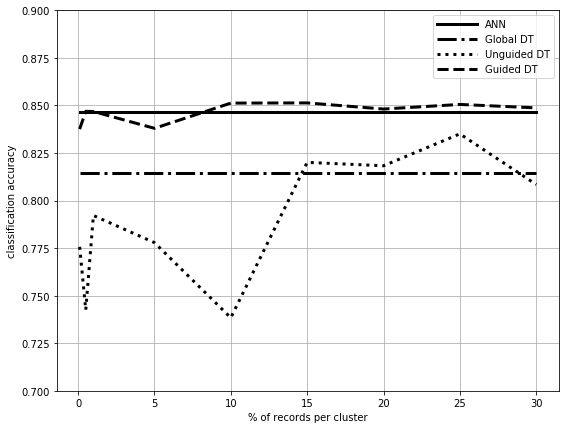

In [112]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

representativity = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
representativity = list([r*100 for r in representativity])
representativity = representativity

xnew = np.linspace(min(representativity),max(representativity),300)
spl = make_interp_spline(representativity, acc_explanations, k=3) #BSpline object
ynew = spl(xnew)

spl = make_interp_spline(representativity, acc_explanations_ext, k=3) #BSpline object
ynew4 = spl(xnew)

acc_blackbox_const = [acc_blackbox]*len(representativity)
spl = make_interp_spline(representativity, acc_blackbox_const, k=3) #BSpline object
ynew2 = spl(xnew)

big_tree = [acc_surrogate]*len(representativity)
spl = make_interp_spline(representativity, big_tree, k=3) #BSpline object
ynew6 = spl(xnew)

spl = make_interp_spline(representativity, acc_cross, k=3) #BSpline object
ynew3 = spl(xnew)

spl = make_interp_spline(representativity, acc_cross_ext, k=3) #BSpline object
ynew5 = spl(xnew)

spl = make_interp_spline(representativity, exec_times, k=3)
ynew7 = spl(xnew)

plt.figure(figsize=(9,7))
#plt.plot(xnew,ynew2,linestyle='-',linewidth=3,color='k',label='ANN')
#plt.plot(xnew,ynew6,linestyle='-.',linewidth=3,color='k',label='Global DT')
#plt.plot(xnew,ynew,linestyle=':',linewidth=3,color='k',label='Unguided DT')
#plt.plot(xnew,ynew4,linestyle='--',linewidth=3,color='k',label='Guided DT')

plt.plot(representativity,acc_blackbox_const,linestyle='-',linewidth=3,color='k',label='ANN')
plt.plot(representativity,big_tree,linestyle='-.',linewidth=3,color='k',label='Global DT')
plt.plot(representativity,acc_explanations,linestyle=':',linewidth=3,color='k',label='Unguided DT')
plt.plot(representativity,acc_explanations_ext,linestyle='--',linewidth=3,color='k',label='Guided DT')

plt.legend(handlelength=4)
plt.ylim(0.7,0.9)
plt.xlabel('% of records per cluster')
plt.ylabel('classification accuracy')
plt.grid()
plt.show()
plt.close()

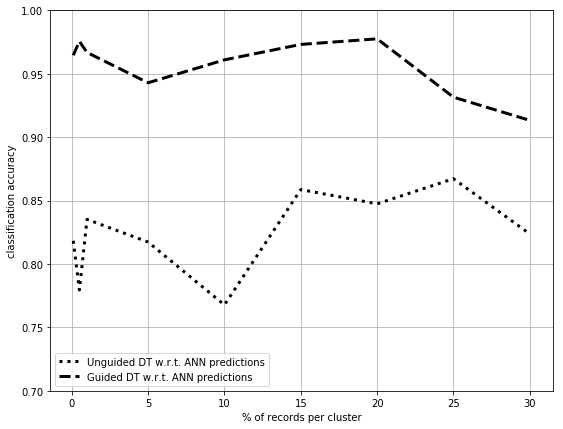

In [113]:
plt.figure(figsize=(9,7))
#plt.plot(xnew,ynew3,linestyle='-',linewidth=3,color='k',label='Unguided DT w.r.t. ANN predictions')
#plt.plot(xnew,ynew5,linestyle=':',linewidth=3,color='k',label='Guided DT w.r.t. ANN predictions')

plt.plot(representativity,acc_cross,linestyle=':',linewidth=3,color='k',label='Unguided DT w.r.t. ANN predictions')
plt.plot(representativity,acc_cross_ext,linestyle='--',linewidth=3,color='k',label='Guided DT w.r.t. ANN predictions')

plt.legend(loc='lower left')
plt.ylim(0.7,1)
plt.xlabel('% of records per cluster')
plt.ylabel('classification accuracy')
plt.grid()
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(9,7))
plt.boxplot(n_counts)
locs, _ = plt.xticks()
plt.xticks(locs, representativity)
#plt.yscale('log')
plt.xlabel('% of records per cluster')
plt.ylabel('number of nodes')
#plt.ylabel('number of nodes (log scale)')
plt.grid()
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(representativity,exec_times,linestyle='-',linewidth=3,color='k')

plt.legend()
plt.xlabel('% of records per cluster')
plt.ylabel('execution time (s)')
plt.grid()
plt.show()
plt.close()

In [20]:
numeric = [0, 3, 9, 10, 11]
numeric = [adult.columns.values[i] for i in numeric]
categorical = [1, 2, 4, 5, 6, 7, 8, 12]
categorical = [adult.columns.values[i] for i in categorical]

labels = numeric
for cat in categorical:
    labels += list([f'{cat}_{value}' for value in adult[cat].unique()])
    
display(y_train.unique())

array([1, 0], dtype=int64)

c:\users\alberto blanco\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


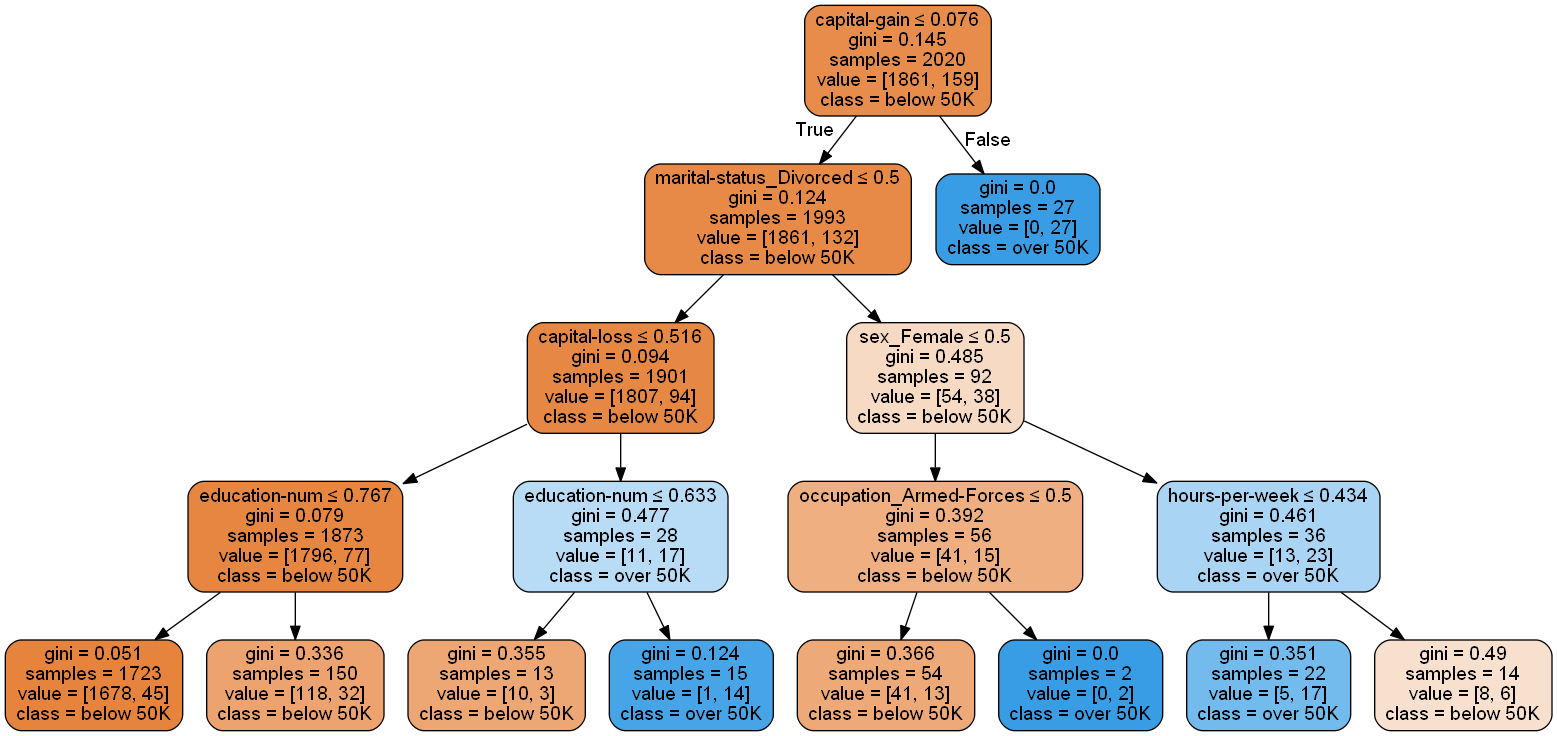

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

for clu_explanation in clu_explanations:
    dot_data = StringIO()
    export_graphviz(clu_explanation[0], out_file=dot_data,  
                    filled=True, rounded=True, feature_names=labels, class_names=['below 50K', 'over 50K'],
                    special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

    

In [47]:
X_test_r = X_test.reset_index(drop=True)
y_test_r = y_test.reset_index(drop=True)

wanted_representativity = 0.1

prediction_is_one = np.argwhere(blackbox_predictions==1)
j = 6
i = prediction_is_one[j,0]

query = X_test_r.iloc[[i]]
result = y_test_r.iloc[[i]]
display(query)
display(result)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32,0.657534,Self-emp-inc,HS-grad,0.6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.076881,0.0,0.408163,United-States


32    1
Name: class, dtype: int8

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32,0.657534,Self-emp-inc,HS-grad,0.6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.076881,0.0,0.408163,United-States


'The NN says this is class 1'

'The DT says this is class 1'

"The instance is similar to ['0.4453878576639377' 'Local-gov' 'Assoc-acdm' '0.6525969756738945'\n 'Separated' 'Adm-clerical' 'Husband' 'White' 'Male'\n '0.006452850524560477' '0.013057325994388927' '0.37560882341102636'\n 'Philippines']"

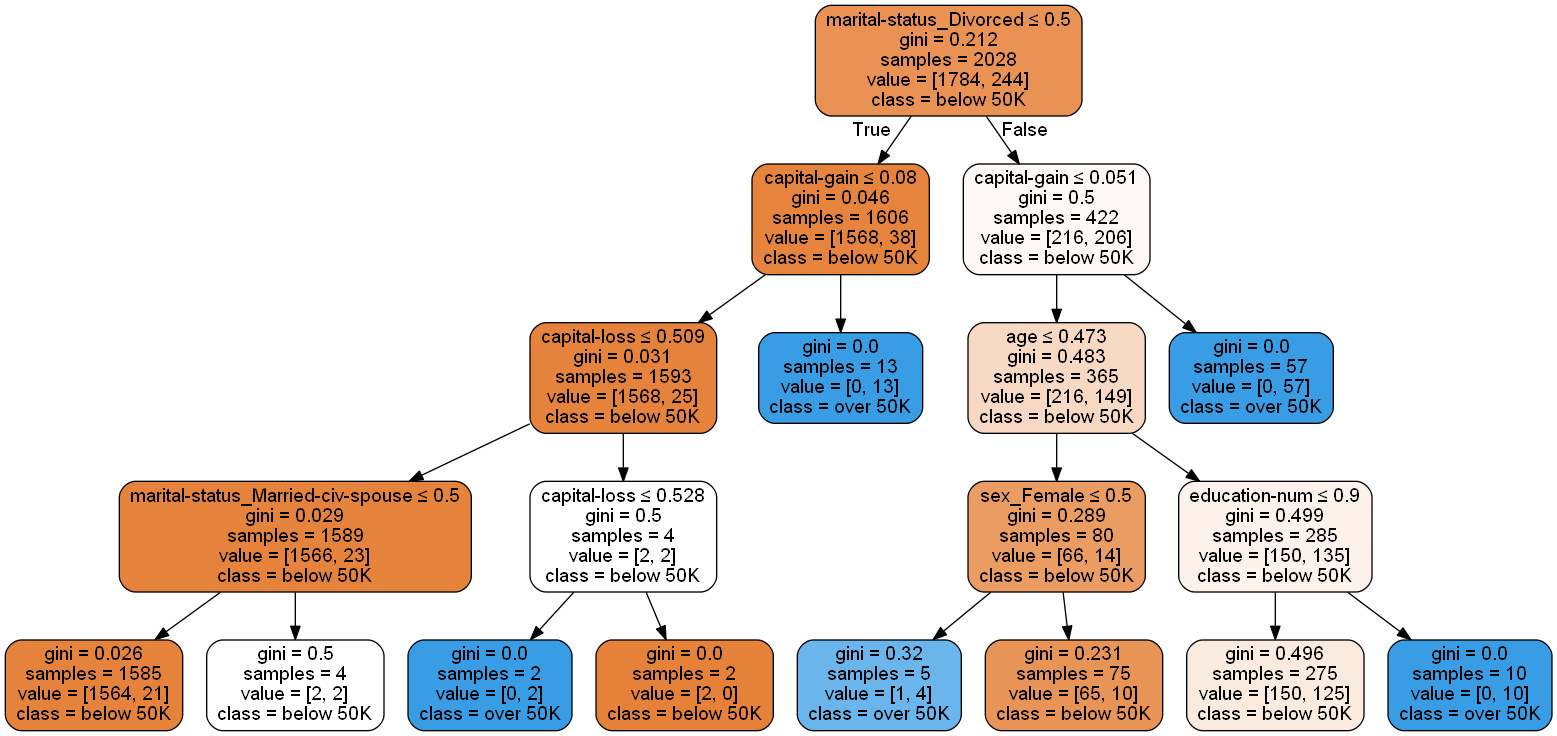

In [49]:
representativity = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
index = representativity.index(wanted_representativity)
index=0

query_transform = enc.transform(query)
bb_pred = blackbox.predict(query_transform)
dt_pred, tree, close_to = pre_explanations_ext(clu_explanations[index], centroids_of_clusterings[index], np.array(query), blackbox_predictions, 3)

display(f'The NN says this is class {bb_pred[0]}')
display(f'The DT says this is class {dt_pred[0]}')
display(f'The instance is similar to {close_to[0]}')

dot_data = StringIO()
export_graphviz(tree[0], out_file=dot_data,  
                filled=True, rounded=True, feature_names=labels, class_names=['below 50K', 'over 50K'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(Image(graph.create_png()))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
6096,0.767123,Self-emp-inc,Masters,0.933333,Divorced,Exec-managerial,Not-in-family,White,Male,0.278283,0.0,0.612245,United-States,1
368,0.616438,Private,Some-college,0.666667,Divorced,Handlers-cleaners,Unmarried,White,Female,0.000000,0.0,0.408163,United-States,0
28817,0.315068,Private,12th,0.533333,Never-married,Craft-repair,Not-in-family,White,Male,0.000000,0.0,0.510204,United-States,0
13891,0.589041,Private,Masters,0.933333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.076881,0.0,0.540816,United-States,1
29901,1.232877,Private,HS-grad,0.600000,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.255102,United-States,0


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
6096,0.767123,Self-emp-inc,Masters,0.933333,Divorced,Exec-managerial,Not-in-family,White,Male,0.278283,0.0,0.612245,United-States


'The NN says this is class 1'

'The DT says this is class 1'

"The instance is similar to ['0.6201749627017487' 'State-gov' 'Bachelors' '0.8556435643564232'\n 'Never-married' 'Adm-clerical' 'Husband' 'White' 'Male'\n '0.059118744652793105' '0.02012019383756557' '0.49316528591634895'\n 'Philippines']"

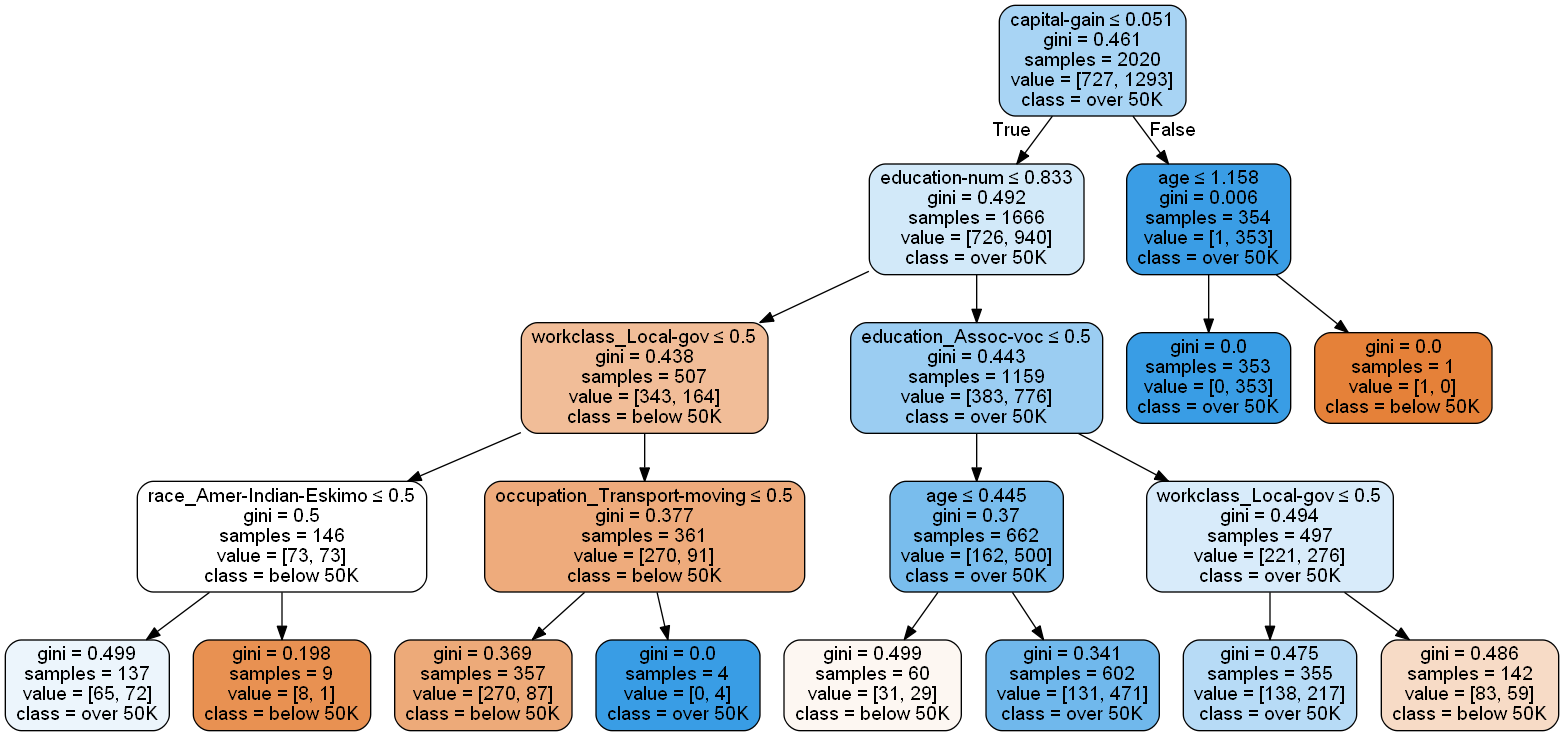

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
368,0.616438,Private,Some-college,0.666667,Divorced,Handlers-cleaners,Unmarried,White,Female,0.0,0.0,0.408163,United-States


'The NN says this is class 0'

'The DT says this is class 0'

"The instance is similar to ['0.4076834395768358' 'Local-gov' 'Some-college' '0.5923102310230971'\n 'Separated' 'Adm-clerical' 'Wife' 'White' 'Female'\n '0.0031765812707632035' '0.005601582885561286' '0.3753384522125754'\n 'Cuba']"

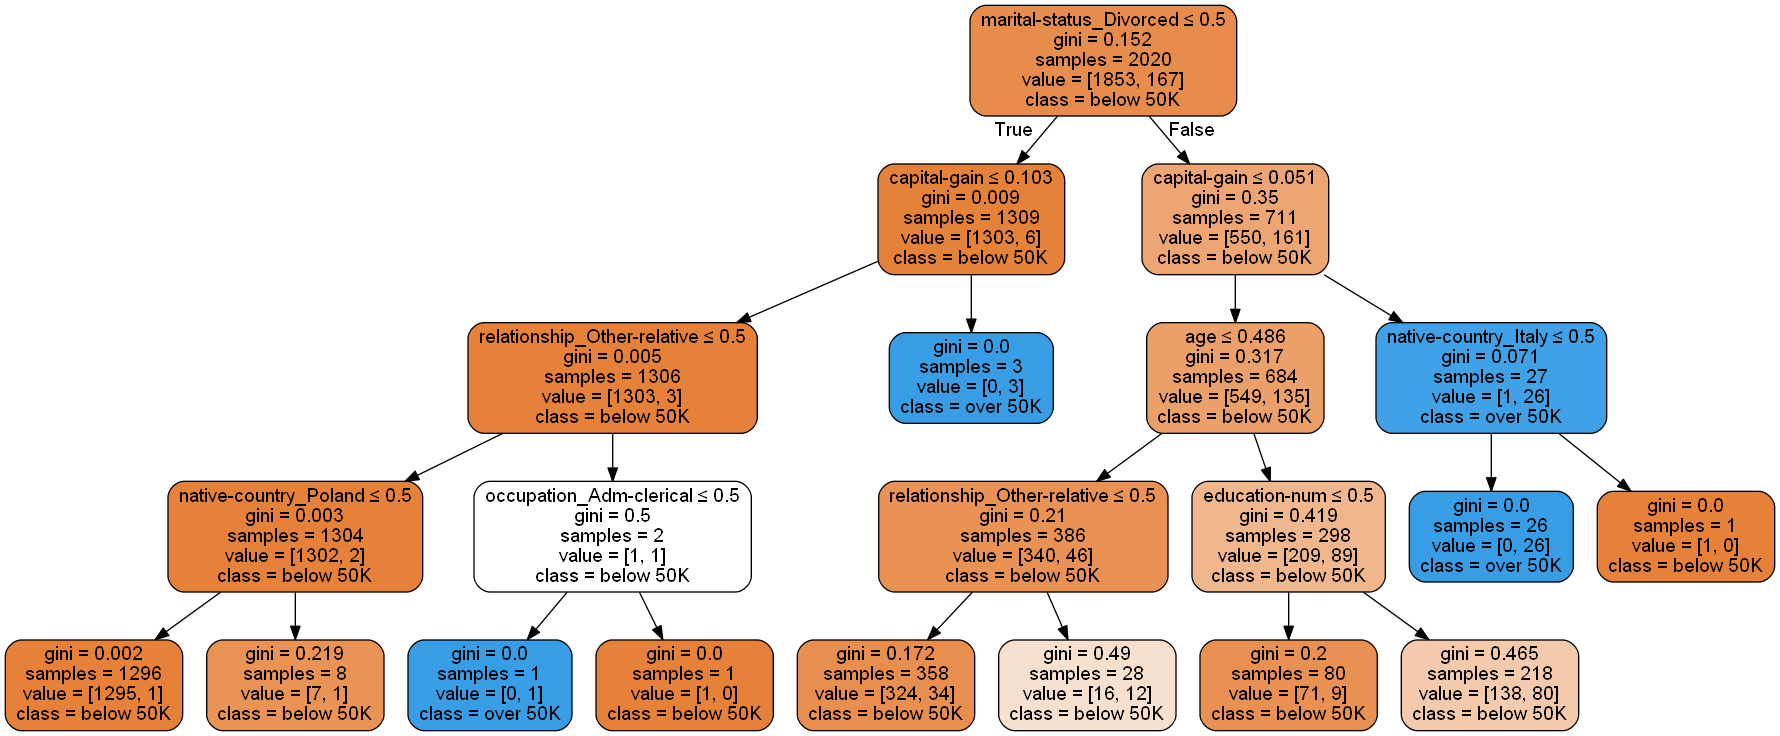

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
28817,0.315068,Private,12th,0.533333,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,0.510204,United-States


'The NN says this is class 0'

'The DT says this is class 0'

"The instance is similar to ['0.4453878576639377' 'Local-gov' 'Assoc-acdm' '0.6525969756738945'\n 'Separated' 'Adm-clerical' 'Husband' 'White' 'Male'\n '0.006452850524560477' '0.013057325994388927' '0.37560882341102636'\n 'Philippines']"

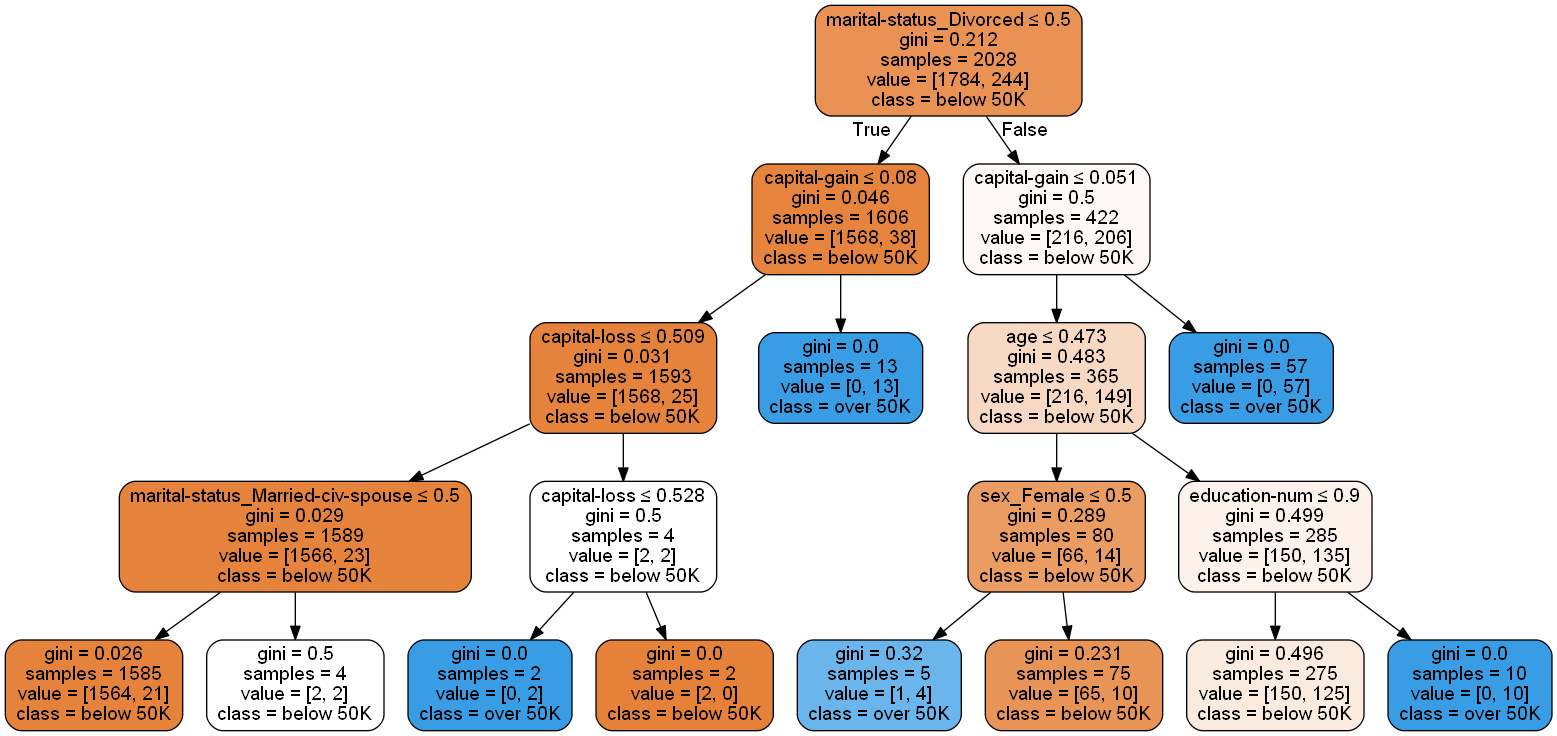

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
13891,0.589041,Private,Masters,0.933333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.076881,0.0,0.540816,United-States


'The NN says this is class 1'

'The DT says this is class 1'

"The instance is similar to ['0.5269157737691567' 'Local-gov' 'Some-college' '0.7057755775577482'\n 'Separated' 'Adm-clerical' 'Husband' 'White' 'Male'\n '0.006297473865827772' '0.022877287728772854' '0.44483228935139024'\n 'Cuba']"

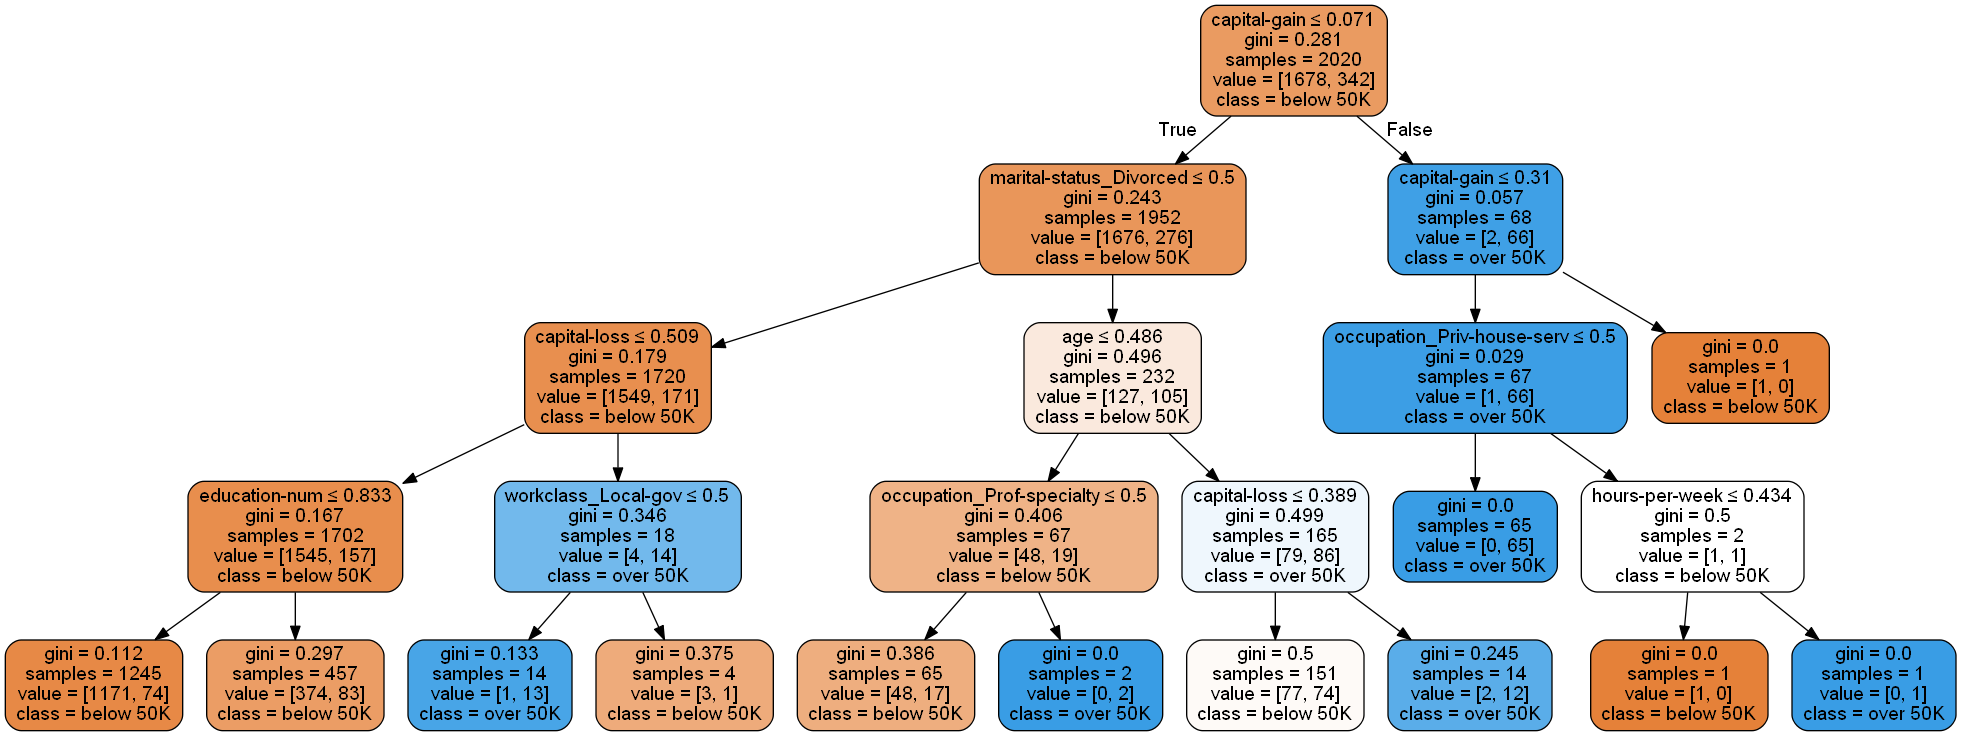

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29901,1.232877,Private,HS-grad,0.6,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,0.255102,United-States


'The NN says this is class 0'

'The DT says this is class 0'

"The instance is similar to ['0.6073714905737115' 'Federal-gov' 'Bachelors' '0.6173927392739236'\n 'Separated' 'Adm-clerical' 'Husband' 'White' 'Female'\n '0.0031798535807140245' '0.032249361299766355' '0.38376439684785507'\n 'Dominican-Republic']"

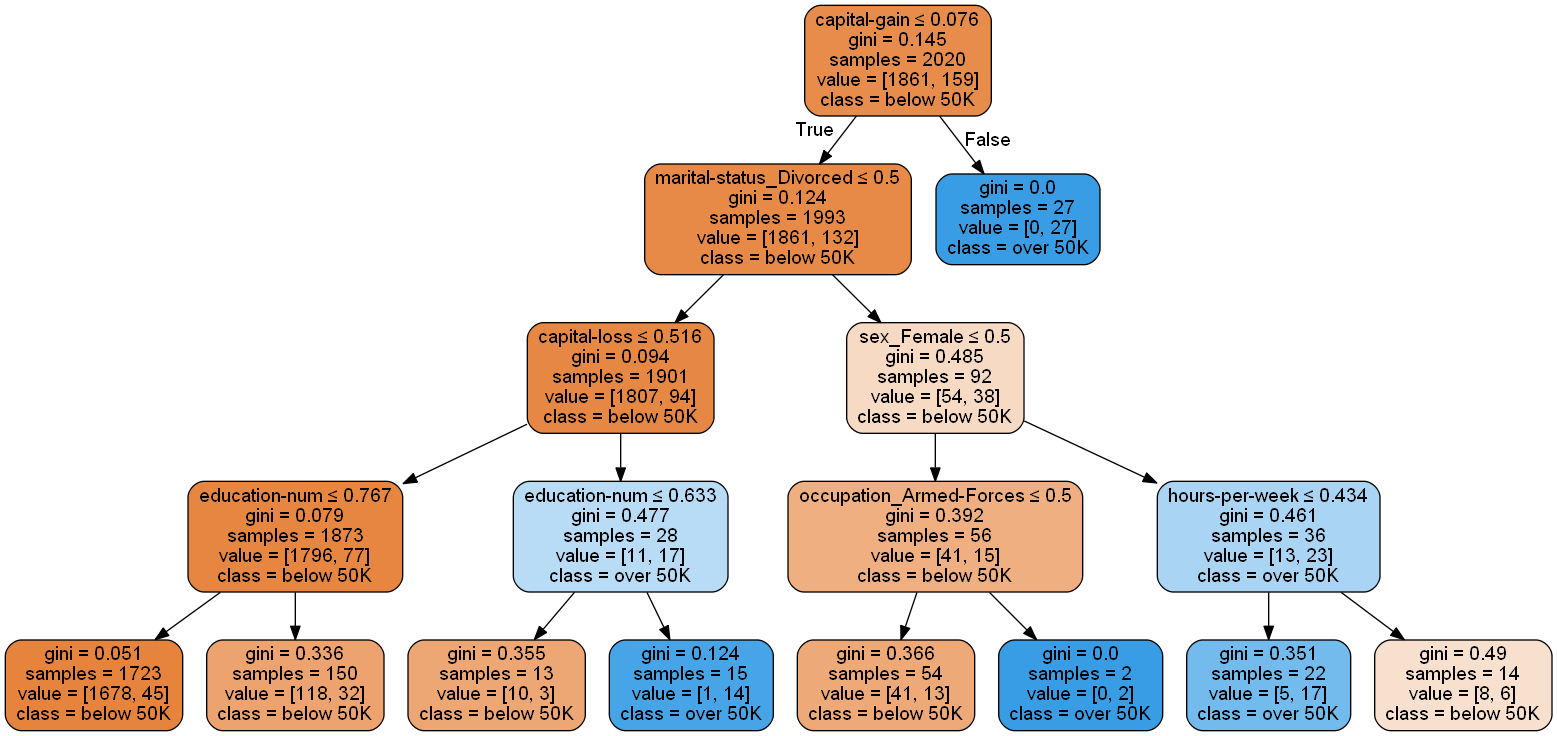

[[array(['0.6201749627017487', 'State-gov', 'Bachelors',
         '0.8556435643564232', 'Never-married', 'Adm-clerical', 'Husband',
         'White', 'Male', '0.059118744652793105', '0.02012019383756557',
         '0.49316528591634895', 'Philippines'], dtype='<U32')],
 [array(['0.4076834395768358', 'Local-gov', 'Some-college',
         '0.5923102310230971', 'Separated', 'Adm-clerical', 'Wife', 'White',
         'Female', '0.0031765812707632035', '0.005601582885561286',
         '0.3753384522125754', 'Cuba'], dtype='<U32')],
 [array(['0.4453878576639377', 'Local-gov', 'Assoc-acdm',
         '0.6525969756738945', 'Separated', 'Adm-clerical', 'Husband',
         'White', 'Male', '0.006452850524560477', '0.013057325994388927',
         '0.37560882341102636', 'Philippines'], dtype='<U32')],
 [array(['0.5269157737691567', 'Local-gov', 'Some-college',
         '0.7057755775577482', 'Separated', 'Adm-clerical', 'Husband',
         'White', 'Male', '0.006297473865827772', '0.022877287728772854'

In [60]:
queries_0 = adult.sample(5, random_state=26)
queries_1 = adult.sample(5, weights=adult['class'], random_state=42)
display(queries_0)
#display(queries_1)
queries_0_arr = queries_0.drop('class',axis=1)

close_to_list = []
for i in range(len(queries_0_arr)):
    q = queries_0_arr.iloc[[i]]
    display(q)
    query_transform = enc.transform(q)
    bb_pred = blackbox.predict(query_transform)
    dt_pred, tree, close_to = pre_explanations_ext(clu_explanations[0], centroids_of_clusterings[0], np.array(q), blackbox_predictions, 3)
    close_to_list.append(close_to)
    
    display(f'The NN says this is class {bb_pred[0]}')
    display(f'The DT says this is class {dt_pred[0]}')
    display(f'The instance is similar to {close_to[0]}')

    dot_data = StringIO()
    export_graphviz(tree[0], out_file=dot_data,  
                    filled=True, rounded=True, feature_names=labels, class_names=['below 50K', 'over 50K'],
                    special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))



In [81]:
display(close_to_list)
close_to_list_x = [r[0] for r in close_to_list]
display(close_to_list_x)
centroids = pd.DataFrame(close_to_list_x, columns=queries_0_arr.columns.values)
pd.set_option('precision', 4)
for i in ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
    centroids[i] = centroids[i].astype(np.float32)
display(centroids)

[[array(['0.6201749627017487', 'State-gov', 'Bachelors',
         '0.8556435643564232', 'Never-married', 'Adm-clerical', 'Husband',
         'White', 'Male', '0.059118744652793105', '0.02012019383756557',
         '0.49316528591634895', 'Philippines'], dtype='<U32')],
 [array(['0.4076834395768358', 'Local-gov', 'Some-college',
         '0.5923102310230971', 'Separated', 'Adm-clerical', 'Wife', 'White',
         'Female', '0.0031765812707632035', '0.005601582885561286',
         '0.3753384522125754', 'Cuba'], dtype='<U32')],
 [array(['0.4453878576639377', 'Local-gov', 'Assoc-acdm',
         '0.6525969756738945', 'Separated', 'Adm-clerical', 'Husband',
         'White', 'Male', '0.006452850524560477', '0.013057325994388927',
         '0.37560882341102636', 'Philippines'], dtype='<U32')],
 [array(['0.5269157737691567', 'Local-gov', 'Some-college',
         '0.7057755775577482', 'Separated', 'Adm-clerical', 'Husband',
         'White', 'Male', '0.006297473865827772', '0.022877287728772854'

[array(['0.6201749627017487', 'State-gov', 'Bachelors',
        '0.8556435643564232', 'Never-married', 'Adm-clerical', 'Husband',
        'White', 'Male', '0.059118744652793105', '0.02012019383756557',
        '0.49316528591634895', 'Philippines'], dtype='<U32'),
 array(['0.4076834395768358', 'Local-gov', 'Some-college',
        '0.5923102310230971', 'Separated', 'Adm-clerical', 'Wife', 'White',
        'Female', '0.0031765812707632035', '0.005601582885561286',
        '0.3753384522125754', 'Cuba'], dtype='<U32'),
 array(['0.4453878576639377', 'Local-gov', 'Assoc-acdm',
        '0.6525969756738945', 'Separated', 'Adm-clerical', 'Husband',
        'White', 'Male', '0.006452850524560477', '0.013057325994388927',
        '0.37560882341102636', 'Philippines'], dtype='<U32'),
 array(['0.5269157737691567', 'Local-gov', 'Some-college',
        '0.7057755775577482', 'Separated', 'Adm-clerical', 'Husband',
        'White', 'Male', '0.006297473865827772', '0.022877287728772854',
        '0.44483

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.6202,State-gov,Bachelors,0.8556,Never-married,Adm-clerical,Husband,White,Male,0.0591,0.0201,0.4932,Philippines
1,0.4077,Local-gov,Some-college,0.5923,Separated,Adm-clerical,Wife,White,Female,0.0032,0.0056,0.3753,Cuba
2,0.4454,Local-gov,Assoc-acdm,0.6526,Separated,Adm-clerical,Husband,White,Male,0.0065,0.0131,0.3756,Philippines
3,0.5269,Local-gov,Some-college,0.7058,Separated,Adm-clerical,Husband,White,Male,0.0063,0.0229,0.4448,Cuba
4,0.6074,Federal-gov,Bachelors,0.6174,Separated,Adm-clerical,Husband,White,Female,0.0032,0.0322,0.3838,Dominican-Republic


In [83]:
centroids2=centroids.set_index([pd.Index([6096, 368, 28817, 13891, 29901])])
display(centroids2)
                     

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
6096,0.6202,State-gov,Bachelors,0.8556,Never-married,Adm-clerical,Husband,White,Male,0.0591,0.0201,0.4932,Philippines
368,0.4077,Local-gov,Some-college,0.5923,Separated,Adm-clerical,Wife,White,Female,0.0032,0.0056,0.3753,Cuba
28817,0.4454,Local-gov,Assoc-acdm,0.6526,Separated,Adm-clerical,Husband,White,Male,0.0065,0.0131,0.3756,Philippines
13891,0.5269,Local-gov,Some-college,0.7058,Separated,Adm-clerical,Husband,White,Male,0.0063,0.0229,0.4448,Cuba
29901,0.6074,Federal-gov,Bachelors,0.6174,Separated,Adm-clerical,Husband,White,Female,0.0032,0.0322,0.3838,Dominican-Republic
